In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from pyts.classification import TimeSeriesForest, TSBF

from modules.categorical_data_coding import code_data
from modules.model_runer import run_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/10_Ca_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,30.67611,29.79112,29.76063,28.96724,28.63155,28.78416,29.07407,29.01298,29.98959,30.5237,...,42.41432,42.94833,42.09384,41.89555,42.71956,43.03997,43.03998,43.57399,43.2384,10Ca/0Que
1,42.62801,42.96372,42.09393,42.33814,42.90275,43.43676,42.67387,42.61278,42.27709,41.5752,...,43.13572,43.24253,43.01364,42.99835,43.62396,43.62397,43.33408,43.08999,43.1052,10Ca/0Que
2,43.53251,43.47152,43.85293,42.96794,43.60885,42.64756,42.51027,43.95978,43.24269,43.3342,...,42.46852,42.13283,42.16334,42.10235,42.42276,43.23147,43.55198,43.73509,43.3231,10Ca/0Que
3,42.95691,40.86642,40.74443,41.98034,42.31605,43.41466,43.12477,43.71988,43.39949,42.7891,...,42.67112,42.65583,43.05264,42.41175,42.10656,42.96107,42.85428,43.14419,43.9071,10Ca/0Que
4,43.90711,43.26632,43.11373,43.02214,43.11375,42.74756,43.41897,43.26638,42.82389,42.8697,...,43.40772,43.30093,43.19414,42.87375,43.45356,43.72827,42.88898,42.35499,41.6073,10Ca/0Que


In [4]:
df.target.unique()

array(['10Ca/0Que', '10Ca/10Que', '10Ca/100Que'], dtype=object)

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,30.67611,29.79112,29.76063,28.96724,28.63155,28.78416,29.07407,29.01298,29.98959,30.5237,...,42.41432,42.94833,42.09384,41.89555,42.71956,43.03997,43.03998,43.57399,43.2384,0
1,42.62801,42.96372,42.09393,42.33814,42.90275,43.43676,42.67387,42.61278,42.27709,41.5752,...,43.13572,43.24253,43.01364,42.99835,43.62396,43.62397,43.33408,43.08999,43.1052,0
2,43.53251,43.47152,43.85293,42.96794,43.60885,42.64756,42.51027,43.95978,43.24269,43.3342,...,42.46852,42.13283,42.16334,42.10235,42.42276,43.23147,43.55198,43.73509,43.3231,0
3,42.95691,40.86642,40.74443,41.98034,42.31605,43.41466,43.12477,43.71988,43.39949,42.7891,...,42.67112,42.65583,43.05264,42.41175,42.10656,42.96107,42.85428,43.14419,43.9071,0
4,43.90711,43.26632,43.11373,43.02214,43.11375,42.74756,43.41897,43.26638,42.82389,42.8697,...,43.40772,43.30093,43.19414,42.87375,43.45356,43.72827,42.88898,42.35499,41.6073,0


# Tree based algorithms

In [6]:
X, y = np.array(df.drop('target', axis=1)), np.array(df['target'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [8]:
dtc = DecisionTreeClassifier(max_depth=10, 
                             max_leaf_nodes=15, min_samples_leaf=15)

 CV Scores: [0.66237942 0.64630225 0.65861514 0.65861514]
 CV Mean score: 0.6564779864444341


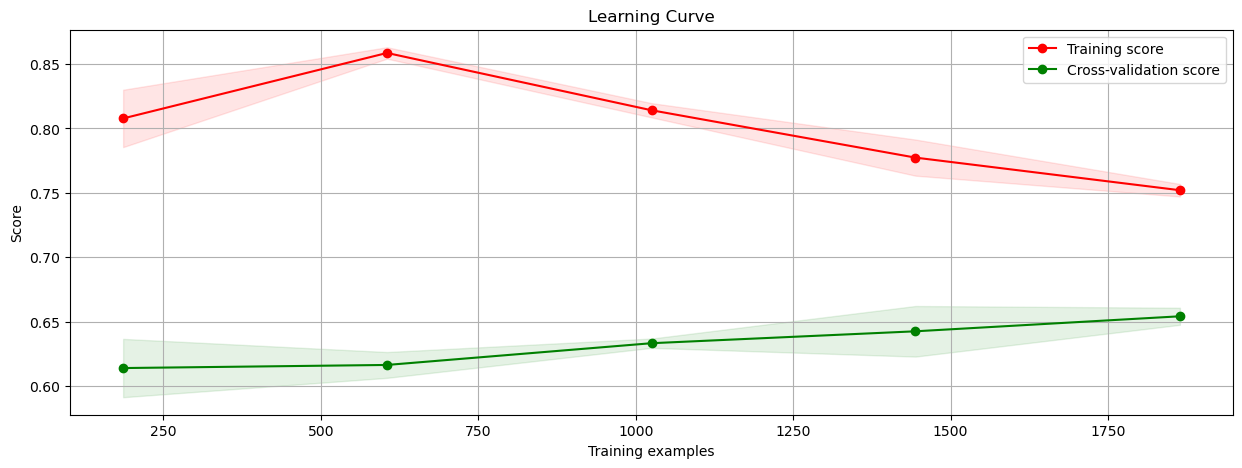

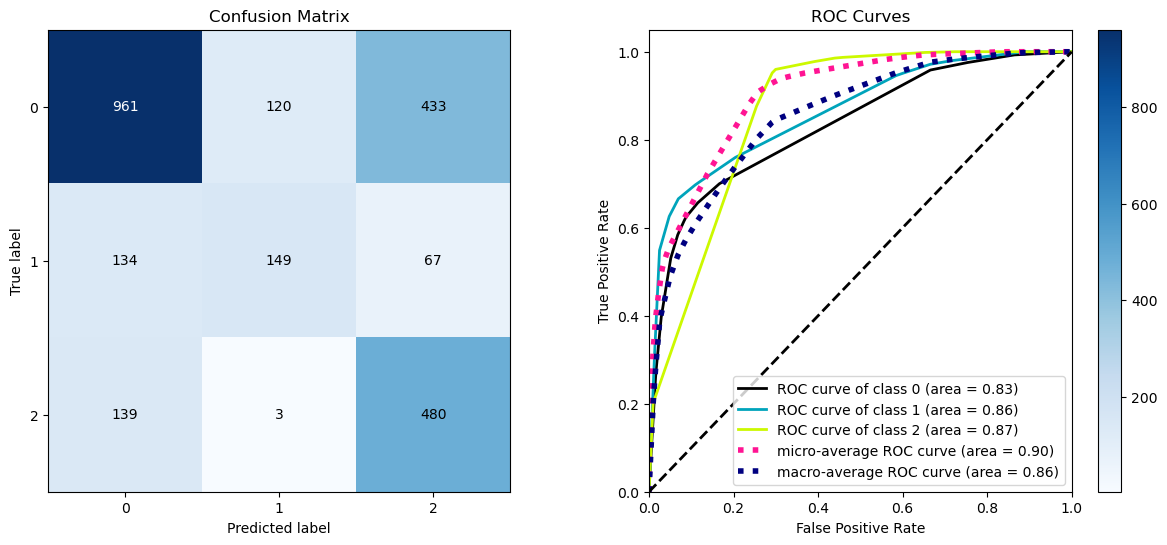

In [9]:
run_model(dtc, X_train, y_train)

In [10]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=15)

In [11]:
dtc_pred = dtc.predict(X_test)

In [12]:
f1_score(y_test, dtc_pred, average='weighted')

0.654301418280858

In [13]:
accuracy_score(y_test, dtc_pred)

0.6479099678456591

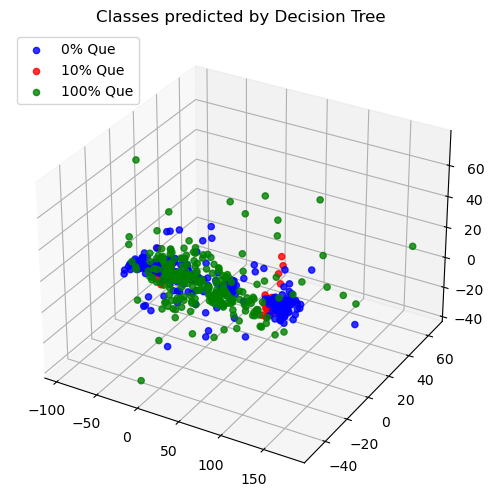

In [14]:
draw_classes_scatterplot(X_test, dtc_pred, "Classes predicted by Decision Tree",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Random Forest Classifer

In [15]:
rfc = RandomForestClassifier(n_estimators=35, max_depth=10, 
                             max_leaf_nodes=15, min_samples_leaf=15)

 CV Scores: [0.75080386 0.70900322 0.71819646 0.72141707]
 CV Mean score: 0.7248551501312581


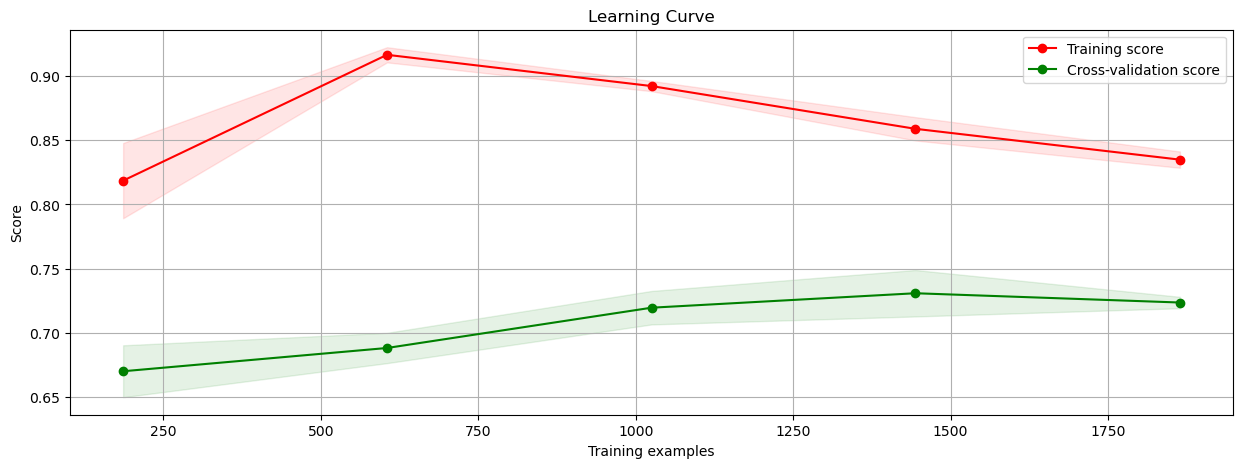

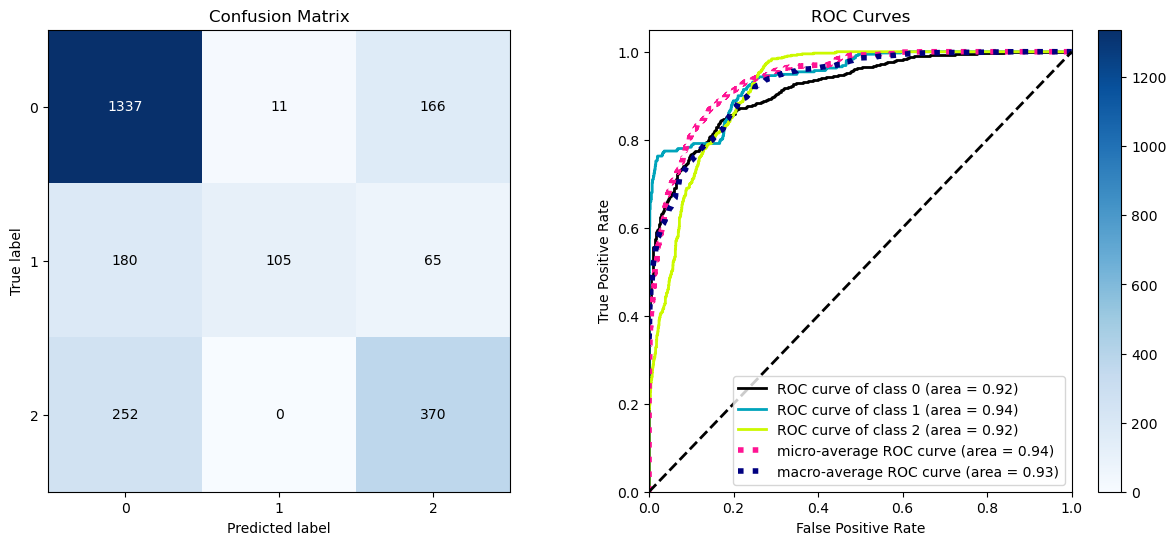

In [16]:
run_model(rfc, X_train, y_train)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=15,
                       n_estimators=35)

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
f1_score(y_test, rfc_pred, average='weighted')

0.7433449393005553

In [20]:
accuracy_score(y_test, rfc_pred)

0.7604501607717041

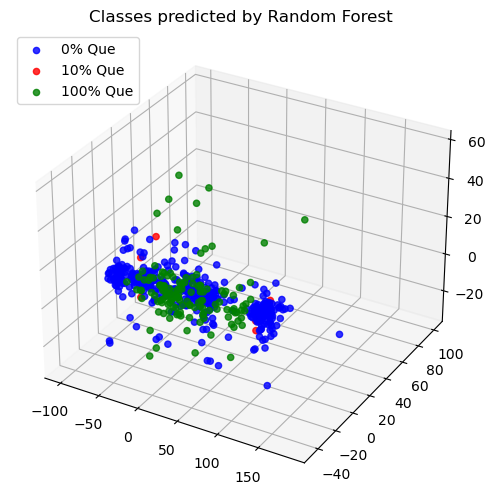

In [21]:
draw_classes_scatterplot(X_test, rfc_pred, "Classes predicted by Random Forest",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Light GBM Classifier

In [22]:
lgbm = LGBMClassifier(n_estimators=15, max_depth=3, min_child_samples=10)

 CV Scores: [0.70096463 0.65755627 0.67149758 0.69082126]
 CV Mean score: 0.6802099352253134


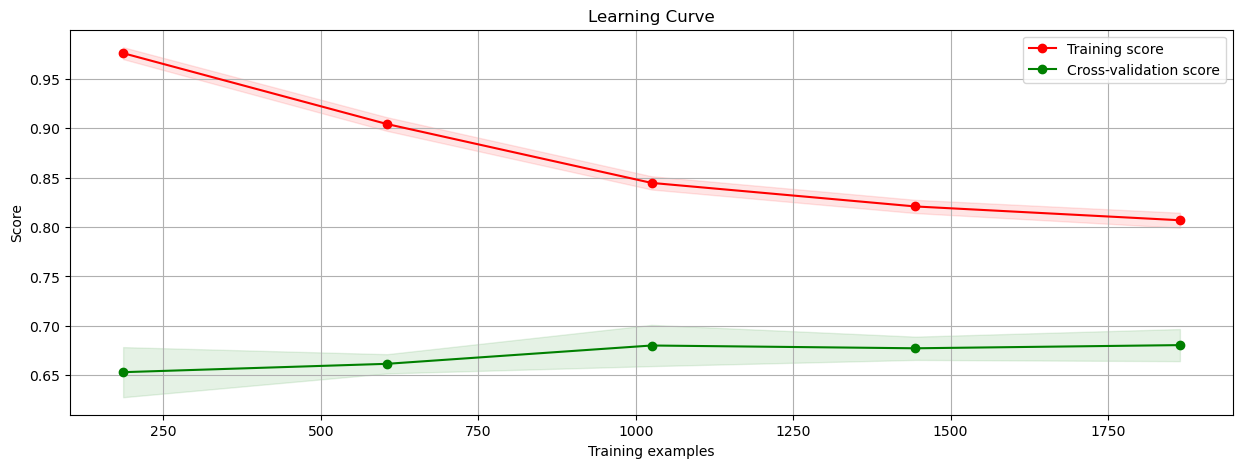

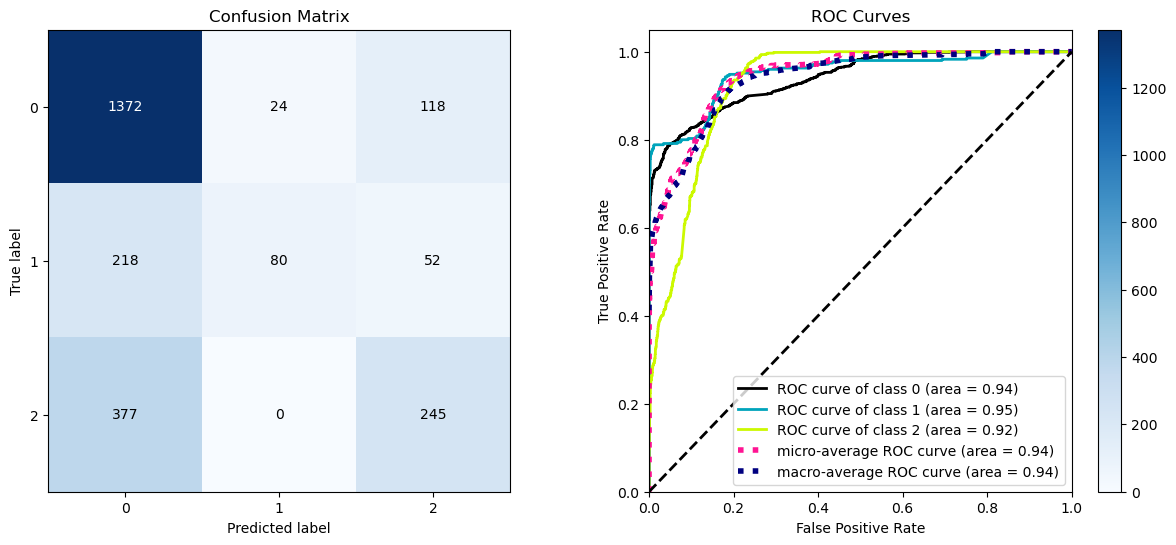

In [23]:
run_model(lgbm, X_train, y_train)

In [24]:
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, min_child_samples=10, n_estimators=15)

In [25]:
lgbm_pred = lgbm.predict(X_test)

In [26]:
f1_score(y_test, lgbm_pred, average='weighted')

0.6623698508289922

In [27]:
accuracy_score(y_test, lgbm_pred)

0.7009646302250804

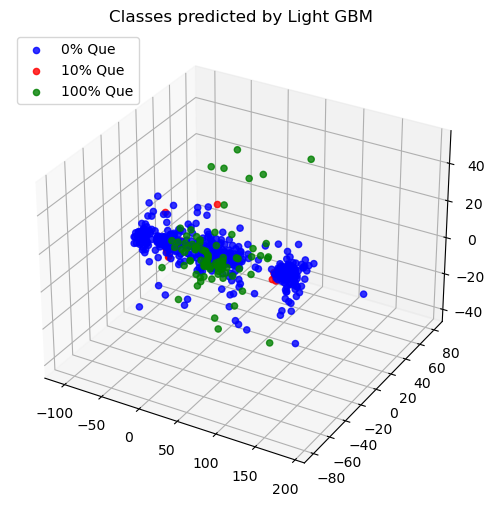

In [28]:
draw_classes_scatterplot(X_test, lgbm_pred, "Classes predicted by Light GBM", 
                        ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Time Series Forest Classifier

In [29]:
tsf = TimeSeriesForest(n_estimators=18, max_depth=6, min_samples_leaf=10)

 CV Scores: [0.79421222 0.75884244 0.76811594 0.77133655]
 CV Mean score: 0.773126789588414


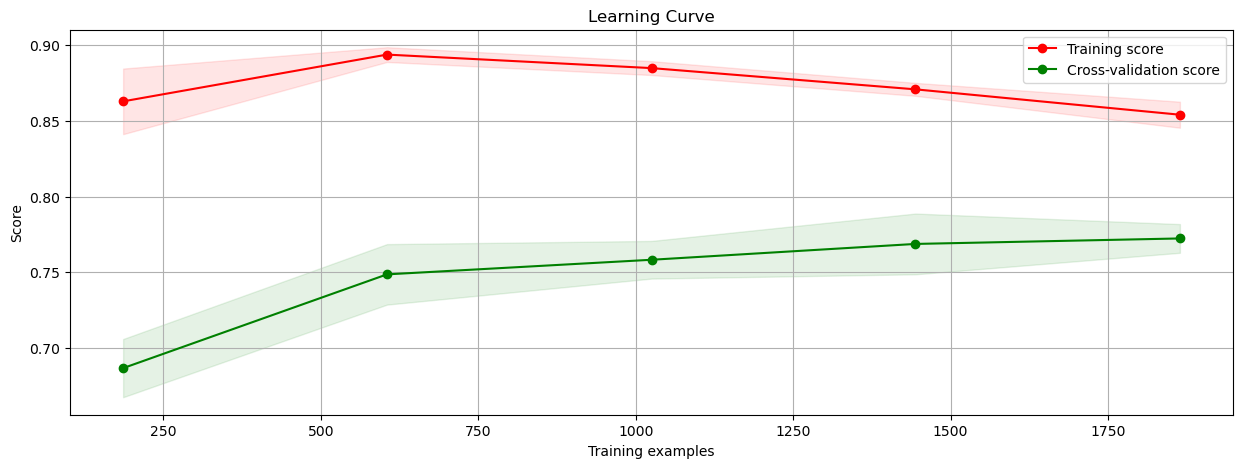

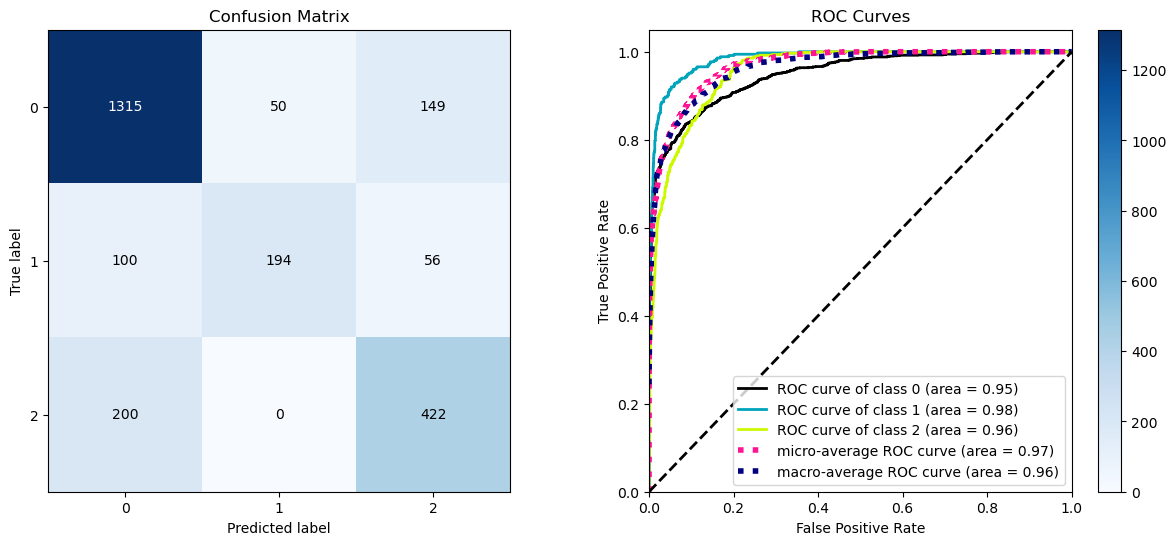

In [30]:
run_model(tsf, X_train, y_train)

In [31]:
tsf.fit(X_train, y_train)

TimeSeriesForest(max_depth=6, min_samples_leaf=10, n_estimators=18)

In [32]:
tsf_pred = tsf.predict(X_test)

In [33]:
f1_score(y_test, tsf_pred, average='weighted')

0.7972754194619146

In [34]:
accuracy_score(y_test, tsf_pred)

0.797427652733119

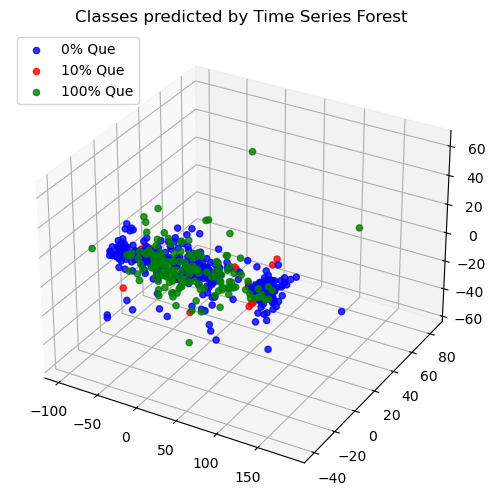

In [35]:
draw_classes_scatterplot(X_test, tsf_pred, "Classes predicted by Time Series Forest", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## TSBF

In [36]:
tsbf = TSBF(n_estimators=50, max_leaf_nodes=15, max_depth=8, min_samples_leaf=10)

 CV Scores: [0.78778135 0.76848875 0.784219   0.79388084]
 CV Mean score: 0.7835924838581066


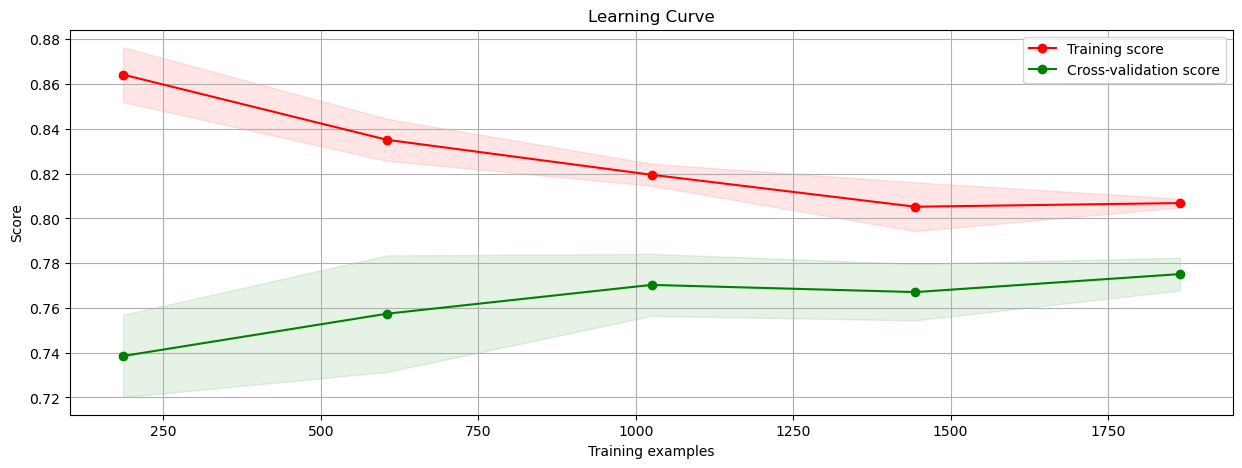

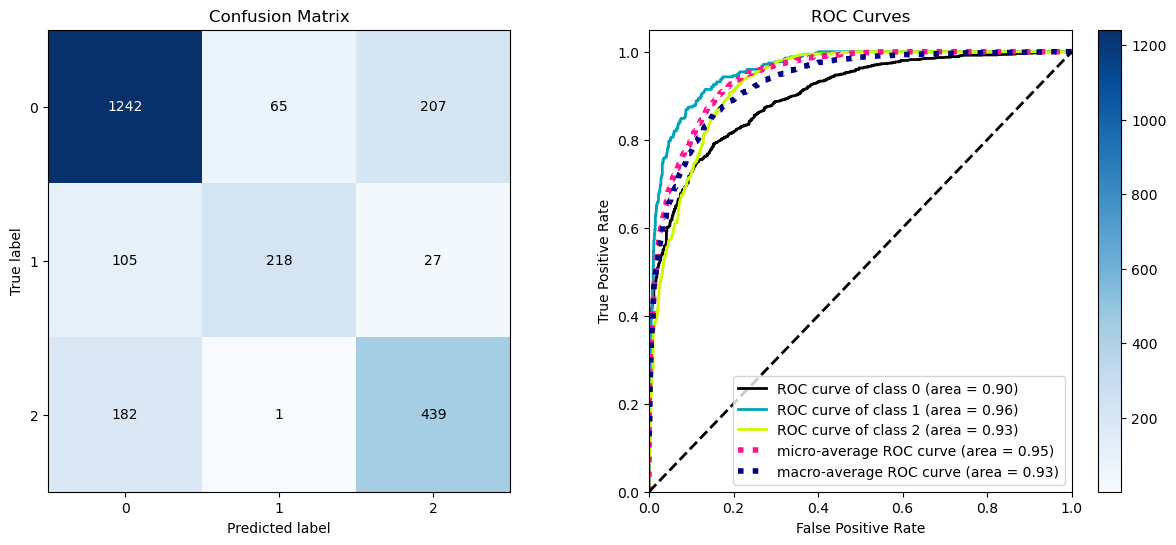

In [37]:
run_model(tsbf, X_train, y_train)

In [38]:
tsbf.fit(X_train, y_train)

TSBF(max_depth=8, max_leaf_nodes=15, min_samples_leaf=10, n_estimators=50)

In [39]:
tsbf_pred = tsbf.predict(X_test)

In [40]:
f1_score(y_test, tsbf_pred, average='weighted')

0.7876090273830179

In [41]:
accuracy_score(y_test, tsbf_pred)

0.792604501607717

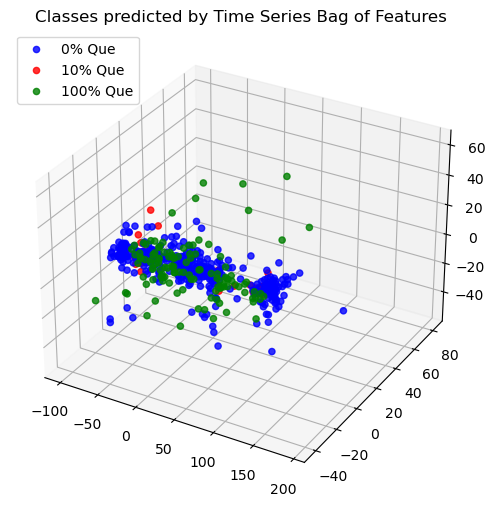

In [42]:
draw_classes_scatterplot(X_test, tsbf_pred, "Classes predicted by Time Series Bag of Features", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])